# Validando instalação das bibliotecas

In [1]:
!pip install pandas

# Importação das libs

In [2]:
import pandas as pd
from datetime import timedelta

# Leitura de datasets

In [13]:
df_orders = pd.read_csv("data/pratica_olist_table_olist_orders_dataset.csv")
df_payments = pd.read_csv("data/pratica_olist_table_olist_order_payments_dataset.csv")

In [14]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
df_orders.isna().sum()*100/df_orders.shape[0]

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [83]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


## 1. Qual é o tempo médio/mediano desde a aprovação do pedido até a sua entrega?

In [ ]:
order_approved_at = pd.to_datetime(df_orders['order_approved_at'])
order_delivered_customer_date = pd.to_datetime(df_orders['order_delivered_customer_date'])

In [64]:
delivery_time = order_delivered_customer_date - order_approved_at

In [78]:
delivery_time_fillna = delivery_time.copy()

In [79]:
delivery_time_fillna[delivery_time_fillna.isna()] = delivery_time.mean()

In [80]:
delivery_time_fillna.mean()

Timedelta('12 days 03:07:42.855694470')

In [81]:
delivery_time.mean()

Timedelta('12 days 03:07:42.855694470')

In [26]:
delivery_time.std()

Timedelta('9 days 12:24:16.979327481')

In [25]:
delivery_time.median()

Timedelta('9 days 20:27:15.500000')

In [41]:
delivery_time.describe()

count                         96462
mean     12 days 03:07:42.855694470
std       9 days 12:24:16.979327481
min               -7 days +00:14:54
25%          6 days 07:26:16.250000
50%          9 days 20:27:15.500000
75%         15 days 03:23:26.750000
max               208 days 12:01:24
dtype: object

<Axes: >

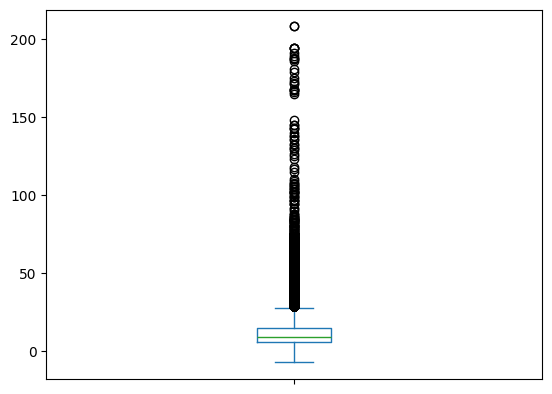

In [40]:
delivery_time.apply(lambda x: x.days).plot.box()

# Fazendo join nos datasets

In [4]:
df_join_order_payment = pd.merge(df_orders, df_payments, 
                                how='inner', 
                                left_on='order_id', right_on='order_id')

In [5]:
df_join_order_payment['order_approved_at'] = pd.to_datetime(df_join_order_payment['order_approved_at'])

In [19]:
df_join_order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103886 non-null  object        
 1   customer_id                    103886 non-null  object        
 2   order_status                   103886 non-null  object        
 3   order_purchase_timestamp       103886 non-null  object        
 4   order_approved_at              103711 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101998 non-null  object        
 6   order_delivered_customer_date  100754 non-null  object        
 7   order_estimated_delivery_date  103886 non-null  object        
 8   payment_sequential             103886 non-null  int64         
 9   payment_type                   103886 non-null  object        
 10  payment_installments           103886 non-null  int64         
 11  

# Pergunta 2:
Identificar qual o mês com maior quantidade de vendas (em número de pedido) e o mês com os maiores
pagamentos (pagamentos);

In [20]:
df_join_order_payment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [21]:
df_join_order_payment['mes'] = df_join_order_payment['order_approved_at'].dt.month

In [22]:
df_join_order_payment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,mes
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,10.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,10.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,10.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,7.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,8.0


In [26]:
df_join_order_payment[df_join_order_payment['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,mes
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,10.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,10.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,10.0


In [31]:
(
    df_join_order_payment
    .drop_duplicates(subset='order_id')
    .groupby('mes')
    .count()[['order_id']]
    .sort_values('order_id', ascending=False)
    .iloc[0]
)

order_id    10968
Name: 8.0, dtype: int64

In [37]:
(
    df_join_order_payment
    .drop_duplicates(subset='order_id')
    .groupby(pd.Grouper(key='order_approved_at', freq='ME'))
    .count()[['order_id']]
    .sort_values('order_id', ascending=False)
    .iloc[0:5]
)

,order_id
order_approved_at,
2017-11-30,7395
2018-03-31,7288
2018-01-31,7187
2018-05-31,7066
2018-04-30,6778


In [38]:
(
    df_join_order_payment
    .groupby(pd.Grouper(key='order_approved_at', freq='ME'))
    .sum()[['payment_value']]
    .sort_values('payment_value', ascending=False)
    .iloc[0:5]
)

,payment_value
order_approved_at,
2018-05-31,1180152.88
2017-11-30,1174911.51
2018-03-31,1170383.27
2018-04-30,1137693.93
2018-01-31,1106076.67
